# Linear Regression Modeling - New York School Data

This notebook uses the cleaned data and what the EDA and visualizations illustrated to build and test linear regression models. These models test whether or not certain demographical data is related to SAT scores, and if so, to what degree.

## Table of Contents
- [Split data, fit it to linear regression model, evaluate model (schools' ethnic majority of students, % students that receive free/reduce lunch](#split)
    - [Results](#results)
- [Scatter plots with line of best fit, residual plots](#scatter)
- [Model using the boroughs](#boroughs)
- [Final results of the modeling](#final_results)
### [***Conclusion***](#conclusion)

#### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
sat_demos = pd.read_csv('sat_demos_model')
#create dataframe with only the scores and the demographic data
sat_demos_scores = sat_demos.iloc[:, 7:]
sat_demos_scores.head()

,SAT Composite Avg. Raw Score,frl_percent,black_hispanic_per,asian_white_per,Black/Hispanic,Asian/White
0,1122.0,88.6,82.9,15.7,100,0
1,1172.0,71.8,68.5,31.5,100,0
2,1149.0,71.8,79.3,20.1,100,0
3,1174.0,72.8,93.8,5.8,100,0
4,1207.0,80.7,88.5,10.9,100,0


<a class="anchor" id="split"></a> 
#### Split the data, fit to Linear Regression Model, and Evaluate Model

In [3]:
# function that splits the data, creates the model, and calculates the intercept, coef, rmse
def linear_regression(col, df, y):
    x = np.array(df[col]).reshape(-1,1)
    #split the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    #fit the linear regression model to training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    #use the model with test data
    pred = model.predict(X_test)
    predictions = pred.reshape(-1,1)
    print(col)
    #calculate the intercept
    intercept = model.intercept_[0]
    print('intercept: ', intercept)
    #calculate the coef
    coef = model.coef_[0][0]
    print('coefficient: ', coef)
    #evaluate the model
    print('MSE: ', mean_squared_error(y_test, predictions))
    #calculate root mean squareed error
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print('RMSE: ', rmse)
    print()
    return intercept, coef, rmse

In [4]:
#y values == SAT scores
y = np.array(sat_demos_scores['SAT Composite Avg. Raw Score'])
#the various x values to be tested
x_columns = list(sat_demos_scores.columns)[1:-3]
intercepts = []
coefs = []
rmses = []
for col in x_columns:
    intercept, coef, rmse = linear_regression(col, sat_demos_scores, y)
    intercepts.append(intercept)
    coefs.append(coef)
    rmses.append(rmse)

frl_percent
intercept:  1706.7386849773884
coefficient:  -7.453499137933101
MSE:  14847.090716553412
RMSE:  121.84863855026617

black_hispanic_per
intercept:  1643.1694801971778
coefficient:  -5.288077669675879
MSE:  14112.039623876826
RMSE:  118.79410601488959



<a class="anchor" id="results"></a> 
#### Results of Linear Regression

The raw percentages for the ethnicity measures of schools proved to create better models than all other measures.

This does not indicate any significant causation between the ethnic breakdown of a school and its average SAT score. Instead, what it seems to show is that average SAT scores across NYC schools could be better predicted if one knew the raw percentages. In other words, just using the percent of free/reduced lunch recipients in a school is a slightly worse predictor than the ethnicity percentages.

In [5]:
linear_regression_results = (pd.DataFrame(
    data={'Independent Variable':x_columns, 'Intercept':intercepts, 'Coefficient':coefs, 'Root Mean Square Error':rmses}))
linear_regression_results.sort_values('Root Mean Square Error')

,Independent Variable,Intercept,Coefficient,Root Mean Square Error
1,black_hispanic_per,1643.169480,-5.288078,118.794106
0,frl_percent,1706.738685,-7.453499,121.848639


<a class="anchor" id="scatter"></a> 
#### Scatter and Residual Plots

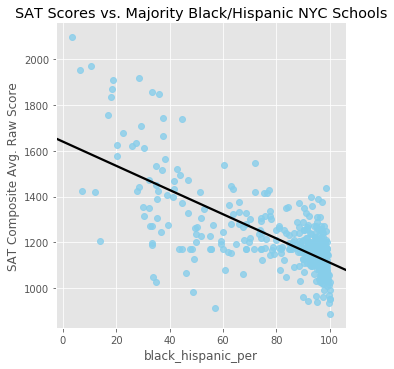

Correlation coefficient:  -0.7150066938301929


In [6]:
(sns.lmplot(x='black_hispanic_per', y='SAT Composite Avg. Raw Score', data=sat_demos, 
            line_kws={'color': 'black'}, scatter_kws={'color': 'skyblue'}, ci=None))
plt.title('SAT Scores vs. Majority Black/Hispanic NYC Schools')
plt.show()
print('Correlation coefficient: ', sat_demos['black_hispanic_per'].corr(sat_demos['SAT Composite Avg. Raw Score']))

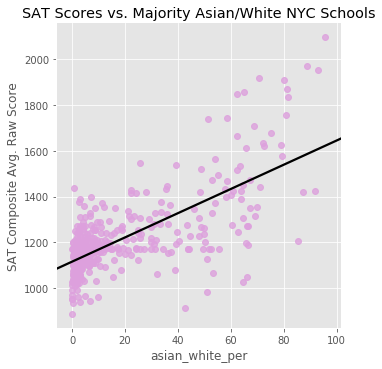

Correlation coefficient:  0.7101994283314358


In [7]:
(sns.lmplot(x='asian_white_per', y='SAT Composite Avg. Raw Score', data=sat_demos, 
            line_kws={'color': 'black'}, scatter_kws={'color': 'plum'}, ci=None))
plt.title('SAT Scores vs. Majority Asian/White NYC Schools')
plt.show()
print('Correlation coefficient: ', sat_demos['asian_white_per'].corr(sat_demos['SAT Composite Avg. Raw Score']))

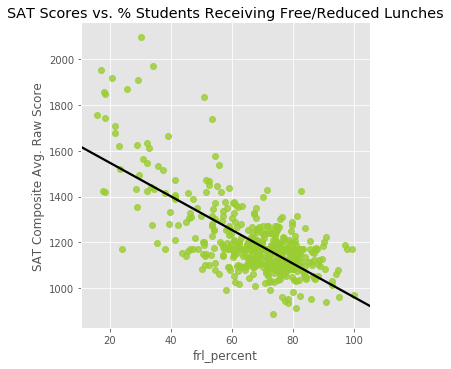

Correlation coefficient:  -0.6974149722922


In [8]:
(sns.lmplot(x='frl_percent', y='SAT Composite Avg. Raw Score', data=sat_demos, 
            line_kws={'color': 'black'}, scatter_kws={'color': 'yellowgreen'}, ci=None))
plt.title('SAT Scores vs. % Students Receiving Free/Reduced Lunches')
plt.show()
print('Correlation coefficient: ', sat_demos['frl_percent'].corr(sat_demos['SAT Composite Avg. Raw Score']))

Resdiual Plots

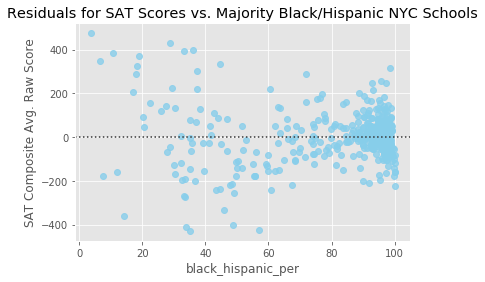

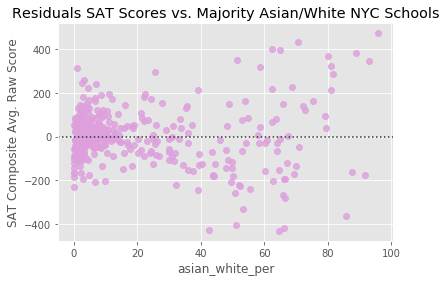

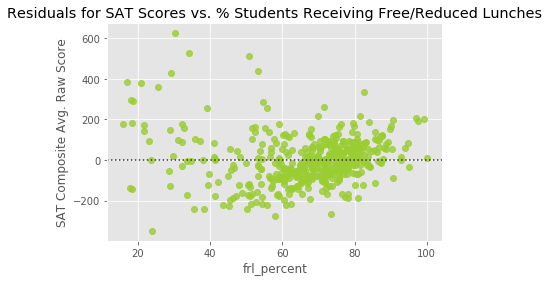

In [9]:
plt.title('Residuals for SAT Scores vs. Majority Black/Hispanic NYC Schools')
sns.residplot(x='black_hispanic_per', y='SAT Composite Avg. Raw Score', data=sat_demos, 
            line_kws={'color': 'black'}, scatter_kws={'color': 'skyblue'})
plt.show()
plt.title('Residuals SAT Scores vs. Majority Asian/White NYC Schools')
sns.residplot(x='asian_white_per', y='SAT Composite Avg. Raw Score', data=sat_demos, 
            line_kws={'color': 'black'}, scatter_kws={'color': 'plum'})
plt.show()
plt.title('Residuals for SAT Scores vs. % Students Receiving Free/Reduced Lunches')
sns.residplot(x='frl_percent', y='SAT Composite Avg. Raw Score', data=sat_demos, 
            line_kws={'color': 'black'}, scatter_kws={'color': 'yellowgreen'})
plt.show()

The strongest correlation coefficients were found with 'black_hispanic_per' and 'asian_white_per.' The residual plots for these independent variables are relatively similar; they're are basically mirror images of each other. The residual plot for 'frl_percent' shows that this model underestimates SAT scores, especially for schools with lower 'frl_percent' values. 

<a class="anchor" id="boroughs"></a> 
### Model Using Boroughs

Since differences in score distributions for schools in different boroughs were seen, I will test linear regression models for schools' SAT score averages based on a school's location.

In [10]:
sat_demos_boroughs = pd.read_csv('sat_demos_with_boroughs')

In [11]:
boroughs = list(sat_demos_boroughs.columns)[-5:]
for b in boroughs:
    x = np.array(sat_demos_boroughs[b]).reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

    model = LinearRegression()
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    predictions = pred.reshape(-1,1)

    print(b)
    intercept = model.intercept_
    intercepts.append(intercept)
    print(intercept)
    
    coef = model.coef_[0]
    coefs.append(coef)
    print(coef)
    
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmses.append(rmse)
    print('MSE: ', mean_squared_error(y_test, predictions))
    print('RMSE: ', rmse)
    print()

Manhattan
1193.4905660377358
0.6481469712015887
MSE:  26512.652883479546
RMSE:  162.82706434582533

Staten Island
1208.2443181818182
1.057556818181818
MSE:  24966.053787520093
RMSE:  158.00649919392586

Queens
1197.8899999999999
0.762266666666667
MSE:  26582.604244197526
RMSE:  163.04172546988553

Brooklyn
1227.484251968504
-0.5736161045906999
MSE:  26827.37710607531
RMSE:  163.79065024010166

Bronx
1228.7397769516729
-0.7178373299562888
MSE:  25032.41403657671
RMSE:  158.2163519885878



<a class="anchor" id="final_results"></a> 
#### Final Results of Fitting the Different Models

In [12]:
linear_regression_results = (pd.DataFrame(
    data={'Independent Variable':x_columns+boroughs, 'Intercept':intercepts, 'Coefficient':coefs, 'Root Mean Squared Error':rmses}))
linear_regression_results.sort_values('Root Mean Squared Error')

,Independent Variable,Intercept,Coefficient,Root Mean Squared Error
1,black_hispanic_per,1643.169480,-5.288078,118.794106
0,frl_percent,1706.738685,-7.453499,121.848639
3,Staten Island,1208.244318,1.057557,158.006499
6,Bronx,1228.739777,-0.717837,158.216352
2,Manhattan,1193.490566,0.648147,162.827064
4,Queens,1197.890000,0.762267,163.041725
5,Brooklyn,1227.484252,-0.573616,163.790650


<a class="anchor" id="conclusion"></a> 
## Conclusion

In analyzing the SAT score data and demographics of New York City public schools, I have found clear associations between ethnicity and socioeconomic status with SAT scores.

Whether a school has mostly Black/Hispanic students or Asian/White students seem to be the most telling factor in how well that school's students will score on the SAT. Additionally, the income level/socioeconomic status of a school's students, based on how many students receive free/reduced lunch, is an important factor in predicting how a school's students will test.  

The fact that higher SAT Scores and percentage of Black or Hispanic students at a school have a NEGATIVE association (lower percentages of Black/Hispanic students, higher SAT scores) while higher SAT scores and percentage of Asian or White students at a school have a POSITIVE association (higher percentages of Asian/White students, higher SAT scores) demonstrate that the SAT is potentially discriminatory against certain groups. The correlation values, which both have an absolute value of about 0.71, and the relatively low RMSE values show that ethnicity is clearly related to how well a student scores on the SAT. These relatively low RMSE values show that using the ethnic breakdown of a school to predict its average SAT score was more successful than using the % of students who receive free/reduced lunch at a school.

Ethnicity obviously does not tell the whole story, for I found a decently strong correlation between SAT scores and percentage of students who receive free/reduced price lunches, along with the 3rd lowest RMSE value. The data shows that schools with higher percentages of students who receive free/reduced price lunches are associated with lower SAT scores. Additionally, the score distribution for schools with lower percentages of students who receive free/reduced price lunches had a much larger right tail than the score distribution for schools with higher percentages of students who receive free/reduced price lunches. 

The discrepancy of SAT scores among the socioeconomic statuses were shown in looking at the schools by borough. While the location of a school did not seem to matter as much as the ethnic breakdown or income level of a school’s students, I saw that SAT scores and location are somewhat related for schools specifically in Staten Island and the Bronx.

All in all, it is clear that the SAT is not fair for students of all socioeconomic statuses. Such standardized tests are another way that systemic issues regarding wealth and/or race are exacerbated and disadvantage minorities and poorer people. While no causation was proved in this basic analysis, the data demonstrating association between SAT scores and student demographics warrant the need to look into making the SAT less discriminatory or finding an entirely new way to measure college-readiness.